In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('data/train.csv')

In [77]:
train.head()

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,850
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,...,Native,US,US,US,Head of Household (HOH),0,0,0,Unknown,570


In [76]:
train.describe()

,Age,Working_Week (Yearly),Gains,Losses,Dividends,Income
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,35.632500,34.943050,383.129500,40.202150,123.451450,554.565250
std,17.994414,22.254592,4144.247487,279.182677,1206.949429,701.553155
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,34.000000,52.000000,0.000000,0.000000,0.000000,500.000000
75%,47.000000,52.000000,0.000000,0.000000,0.000000,875.000000
max,90.000000,52.000000,99999.000000,4356.000000,45000.000000,9999.000000


In [12]:
df1 = train.loc[train['Industry_Status']=='Not in universe or children']

In [13]:
np.unique(df1['Occupation_Status'])

array(['Unknown'], dtype=object)

In [14]:
np.unique(df1['Tax_Status'], return_counts=True)

(array(['Head of Household (HOH)',
        'Married Filling Jointly both over 65 (MFJ)',
        'Married Filling Jointly both under 65 (MFJ)',
        'Married Filling Jointly one over 65 & one under 65 (MFJ)',
        'Nonfiler', 'Single'], dtype=object),
 array([  35,  325,  554,   99, 3297,  378], dtype=int64))

### Industry_Status : Not in universe or children -> Occupation_Status : Unknown

In [15]:
df2 = train.loc[train['Industry_Status']=='Armed Forces']

In [20]:
df2

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
10342,TRAIN_10342,31,F,College,Seeking Full-Time,20,Armed Forces,Armed Forces,White,Puerto Rican,...,Native,US,Puerto-Rico,Puerto-Rico,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median,0


### Industry_Status : Armed Forces -> Occupation_Status : Armed Forces (1명)

In [49]:
df3 = train.loc[train['Age']<15]

In [50]:
len(df3)

2208

In [51]:
test = pd.read_csv('data/test.csv')

In [52]:
print(len(test.loc[test['Age']<15]))

1033


In [48]:
np.unique(df3['Industry_Status'])

array(['Agriculture', 'Business & Repair', 'Education', 'Entertainment',
       'Finance Insurance & Real Estate', 'Manufacturing (Durable)',
       'Manufacturing (Non-durable)', 'Not in universe or children',
       'Other professional services',
       'Personal Services (except Private Household)',
       'Private Household Services', 'Retail', 'Social Services'],
      dtype=object)

In [32]:
df4 = train.loc[train['Occupation_Status']=='Unknown']

In [34]:
np.unique(df4['Industry_Status'])

array(['Not in universe or children'], dtype=object)

In [36]:
len(df1), len(df4)

(4688, 4688)

In [37]:
df5 = train.loc[train['Tax_Status']=='Nonfiler']

<AxesSubplot:xlabel='Count', ylabel='Industry_Status'>

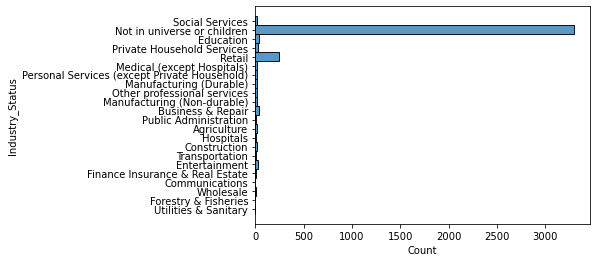

In [41]:
sns.histplot(y=df5['Industry_Status'])

<AxesSubplot:xlabel='Income', ylabel='Count'>

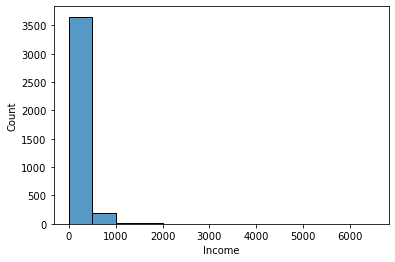

In [78]:
sns.histplot(x=df5['Income'])

In [66]:
df_young = train.loc[train['Age']<20]
df_old = train.loc[train['Age']>=20]

In [71]:
df_young.loc[df_young['Income']>0]

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
48,TRAIN_00048,17,M,High Freshman,Children or Armed Forces,26,Retail,Handlers/Cleaners,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,550
51,TRAIN_00051,18,F,College,Full-Time,52,Education,Services,White,All other,...,Native,US,US,US,Single,0,0,0,Unknown,550
79,TRAIN_00079,19,M,High graduate,Children or Armed Forces,40,Retail,Sales,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,500
89,TRAIN_00089,15,F,High Freshman,Children or Armed Forces,6,Private Household Services,Private Household Services,White,All other,...,Native,US,US,Unknown,Nonfiler,0,0,0,Under Median,200
107,TRAIN_00107,18,F,High graduate,Children or Armed Forces,12,Education,Admin Support (include Clerical),White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19863,TRAIN_19863,16,F,High Sophomore,Full-Time,13,Entertainment,Sales,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Under Median,500
19897,TRAIN_19897,18,M,High graduate,Full-Time,52,Retail,Transportation,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,325
19900,TRAIN_19900,19,M,High graduate,Children or Armed Forces,52,Medical (except Hospitals),Services,White,All other,...,Native,US,US,US,Single,0,0,0,Unknown,600
19931,TRAIN_19931,19,F,College,Children or Armed Forces,28,Retail,Services,White,All other,...,Native,US,US,US,Single,0,0,10,Unknown,425


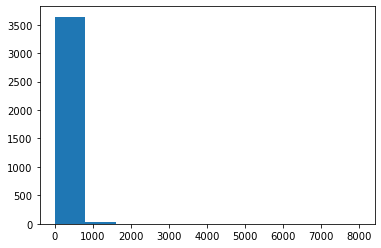

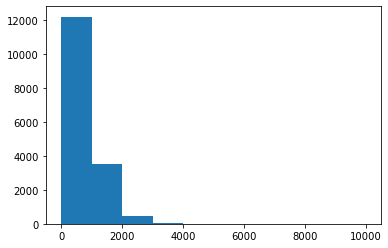

In [67]:
plt.hist(df_young['Income'])
plt.show()

plt.hist(df_old['Income'])
plt.show()

In [73]:
df_new = train.loc[train['Income']>0]

In [74]:
df_new.describe()

,Age,Working_Week (Yearly),Gains,Losses,Dividends,Income
count,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000
mean,36.648500,45.100504,299.215341,43.156773,94.834911,981.270902
std,13.054764,13.602901,2986.794334,285.872584,1072.039666,672.429063
min,15.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,26.000000,46.000000,0.000000,0.000000,0.000000,585.000000
50%,35.000000,52.000000,0.000000,0.000000,0.000000,800.000000
75%,46.000000,52.000000,0.000000,0.000000,0.000000,1200.000000
max,90.000000,52.000000,99999.000000,3900.000000,45000.000000,9999.000000


In [84]:
df_income = train.loc[train['Income']>1000]

In [87]:
df = train.loc[train['Age']>15]

In [88]:
np.unique(df['Employment_Status'])

array(['Children or Armed Forces', 'Choice Part-Time', 'Full-Time',
       'Not Working', 'Part-Time (Usually Full-Time)',
       'Part-Time (Usually Part-Time)', 'Seeking Full-Time',
       'Seeking Part-Time'], dtype=object)